In [1]:
library(rstan)

Warning message:
“package ‘rstan’ was built under R version 3.3.2”Loading required package: ggplot2
Warning message:
“package ‘ggplot2’ was built under R version 3.3.2”Loading required package: StanHeaders
Warning message:
“package ‘StanHeaders’ was built under R version 3.3.2”rstan (Version 2.16.2, packaged: 2017-07-03 09:24:58 UTC, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())


The model specification is given in the Models section.

In [22]:
stan_model <- "

data {
  int<lower=1> N;             // total number of data points
  int<lower=1> cars[N];   // observed number of cars passing by in 1 minute
}

parameters {

  real<lower=0> lambda[N];  // average number of cars passing by in 1 minute (mean of Poisson)
  real<lower=0> alpha1;        // prior parameters
  real<lower=0> beta1;
  real<lower=0> alpha2;        // prior parameters
  real<lower=0> beta2;
}

model {

  alpha1 ~ gamma(2, 0.5);
  beta1 ~ gamma(2, 0.5);
  alpha2 ~ gamma(2, 0.5);
  beta2 ~ gamma(2, 0.5);
  for(i in 1:4) {
    lambda[i] ~ gamma(alpha1, beta1);                    // prior for study i
    cars[i] ~ poisson(lambda[i]);  // likelihood for study i
  }
    for(i in 5:8) {
        lambda[i] ~ gamma(alpha2, beta2);                    // prior for study i
        cars[i] ~ poisson(lambda[i]);  // likelihood for study i
      }
}
"

In [27]:
data <- list(
  N = 8,
  cars = c(2,4,2,3,14,11,10,11)
)

In [28]:
fit <- stan(
  model_code = stan_model,
  data = data,
  cores = 1,
  save_warmup = FALSE
)


SAMPLING FOR MODEL '1dab38b5d664ab96643e65e065d0903d' NOW (CHAIN 1).

Gradient evaluation took 1.4e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.14 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 2000 [  0%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  400 / 2000 [ 20%]  (Warmup)
Iteration:  600 / 2000 [ 30%]  (Warmup)
Iteration:  800 / 2000 [ 40%]  (Warmup)
Iteration: 1000 / 2000 [ 50%]  (Warmup)
Iteration: 1001 / 2000 [ 50%]  (Sampling)
Iteration: 1200 / 2000 [ 60%]  (Sampling)
Iteration: 1400 / 2000 [ 70%]  (Sampling)
Iteration: 1600 / 2000 [ 80%]  (Sampling)
Iteration: 1800 / 2000 [ 90%]  (Sampling)
Iteration: 2000 / 2000 [100%]  (Sampling)

 Elapsed Time: 0.134367 seconds (Warm-up)
               0.139703 seconds (Sampling)
               0.27407 seconds (Total)


SAMPLING FOR MODEL '1dab38b5d664ab96643e65e065d0903d' NOW (CHAIN 2).

Gradient evaluation took 9e-06 seconds
1000 transitions using 10 leapfrog step

The mean, 2.5% and 97.5% confidence intervals are given for each model parameter.

In [38]:
# Print out mean, standard deviation and quantiles
print(fit, pars=c("lambda","alpha1","beta1","alpha2","beta2"), probs=c(.025, 0.5, 0.975))

# Get the samples for the model parameters.
samples <- extract(fit)

Inference for Stan model: 1dab38b5d664ab96643e65e065d0903d.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

           mean se_mean   sd 2.5%   50% 97.5% n_eff Rhat
lambda[1]  2.38    0.02 1.06 0.74  2.25  4.84  3236    1
lambda[2]  3.01    0.02 1.18 1.20  2.85  5.75  3025    1
lambda[3]  2.37    0.02 1.04 0.79  2.24  4.78  3257    1
lambda[4]  2.71    0.02 1.14 1.00  2.55  5.32  3128    1
lambda[5] 12.54    0.05 2.96 7.42 12.28 19.08  4000    1
lambda[6] 10.79    0.04 2.64 6.37 10.57 16.81  4000    1
lambda[7] 10.34    0.04 2.69 5.77 10.16 16.31  4000    1
lambda[8] 10.87    0.04 2.68 6.34 10.64 16.74  4000    1
alpha1     6.24    0.07 3.05 1.97  5.68 13.62  1897    1
beta1      2.60    0.03 1.41 0.71  2.32  6.01  1947    1
alpha2     8.89    0.08 3.77 3.13  8.39 17.64  2137    1
beta2      0.85    0.01 0.39 0.28  0.80  1.75  2447    1

Samples were drawn using NUTS(diag_e) at Sun Oct 29 21:01:55 2017.
For each para

# Samples from the posterior distribution for $\lambda_1$

In [37]:
print(names(fit))

 [1] "lambda[1]" "lambda[2]" "lambda[3]" "lambda[4]" "lambda[5]" "lambda[6]"
 [7] "lambda[7]" "lambda[8]" "alpha1"    "beta1"     "alpha2"    "beta2"    
[13] "lp__"     


In [34]:
samples$lambda

[1] 1.997264

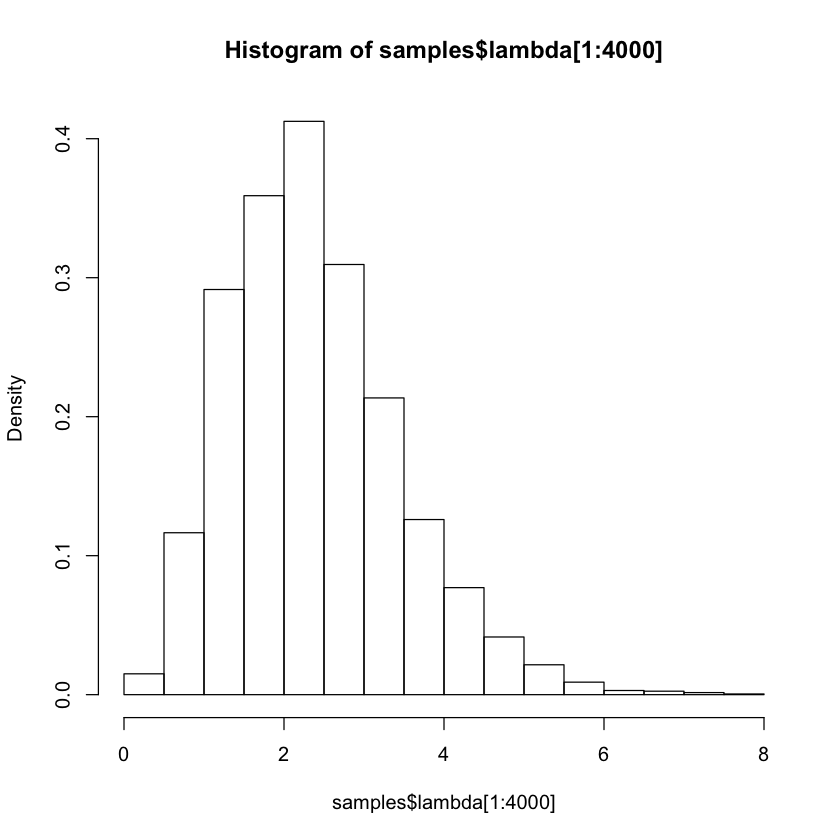

In [43]:
hist(samples$lambda[1:4000], prob=T)

# Samples from the posterior distribution for $\lambda_5$

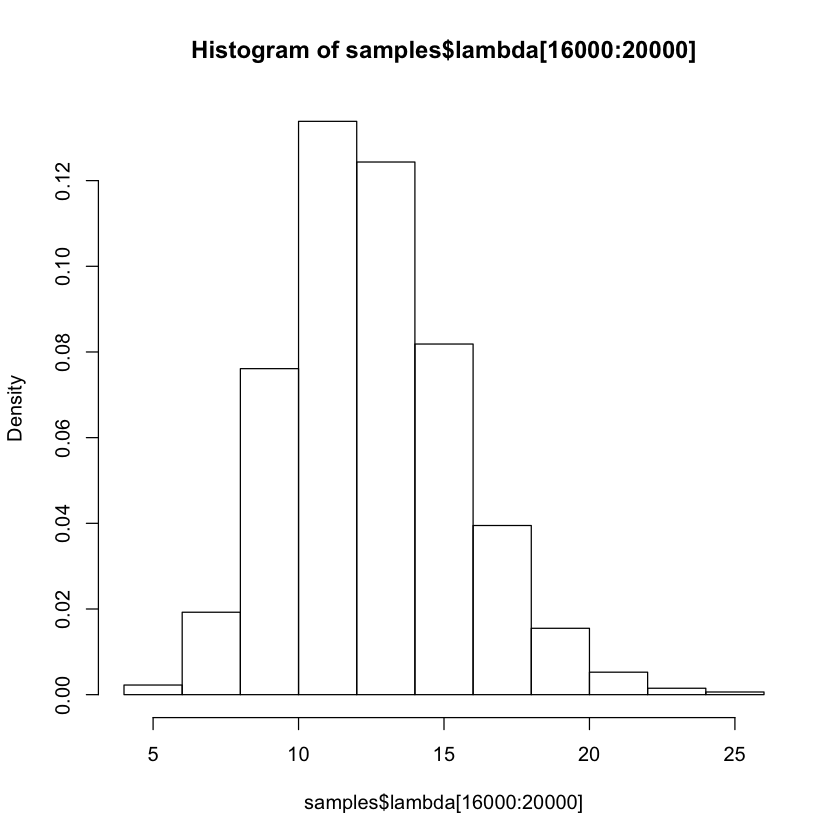

In [45]:
hist(samples$lambda[16000:20000], prob=T)

# Samples from the posterior distribution for $\alpha_1$

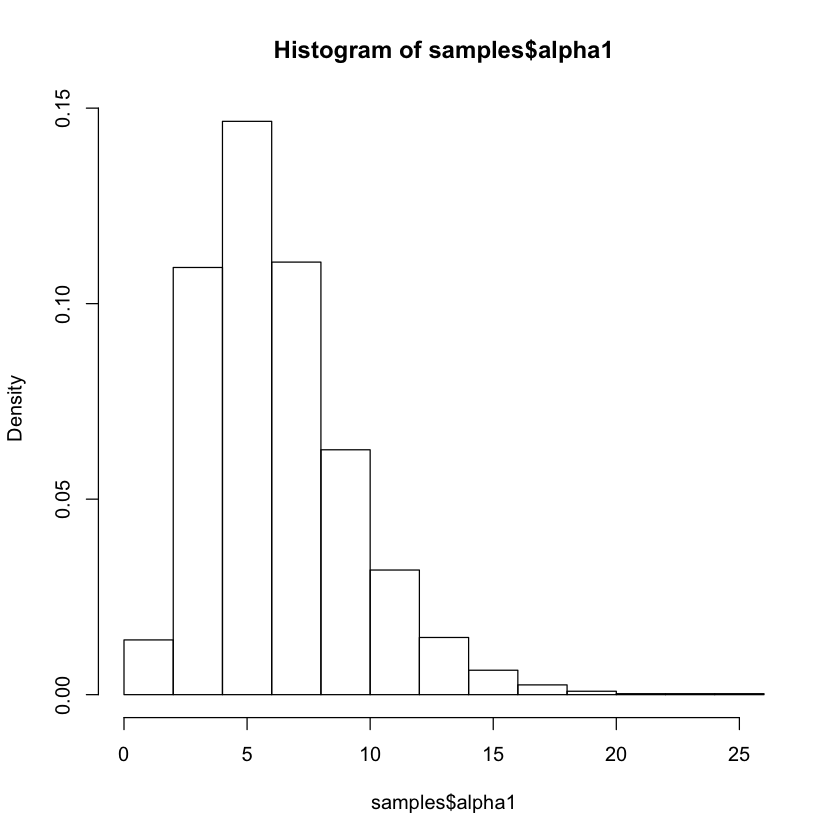

In [48]:
hist(samples$alpha1, prob=T)